In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

print(df.head())
print(df.info())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [21]:
df = df.dropna(subset=['CustomerID', 'Description'])

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.to_csv("cleaned_data.csv", index=False)

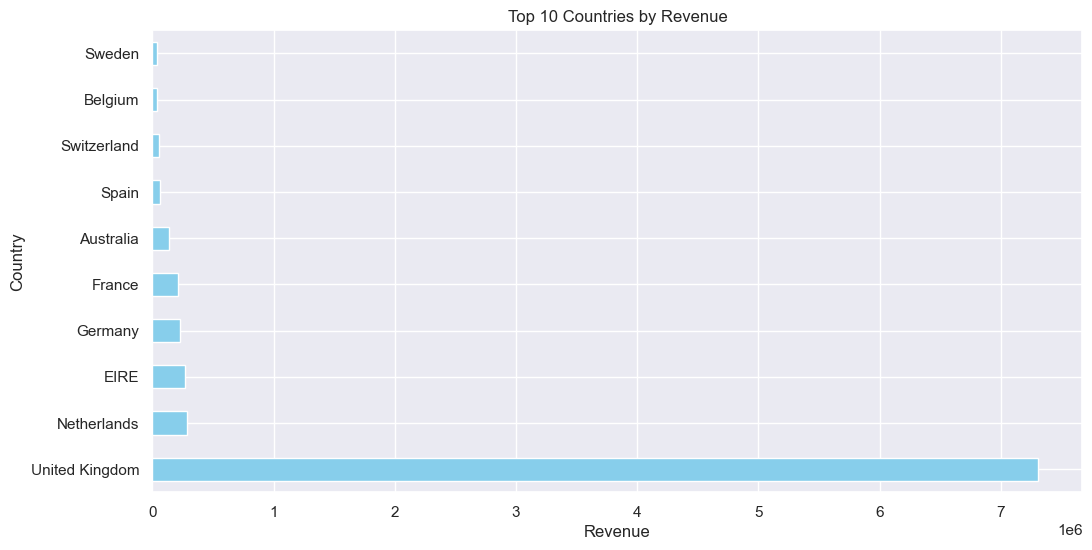

In [18]:
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()


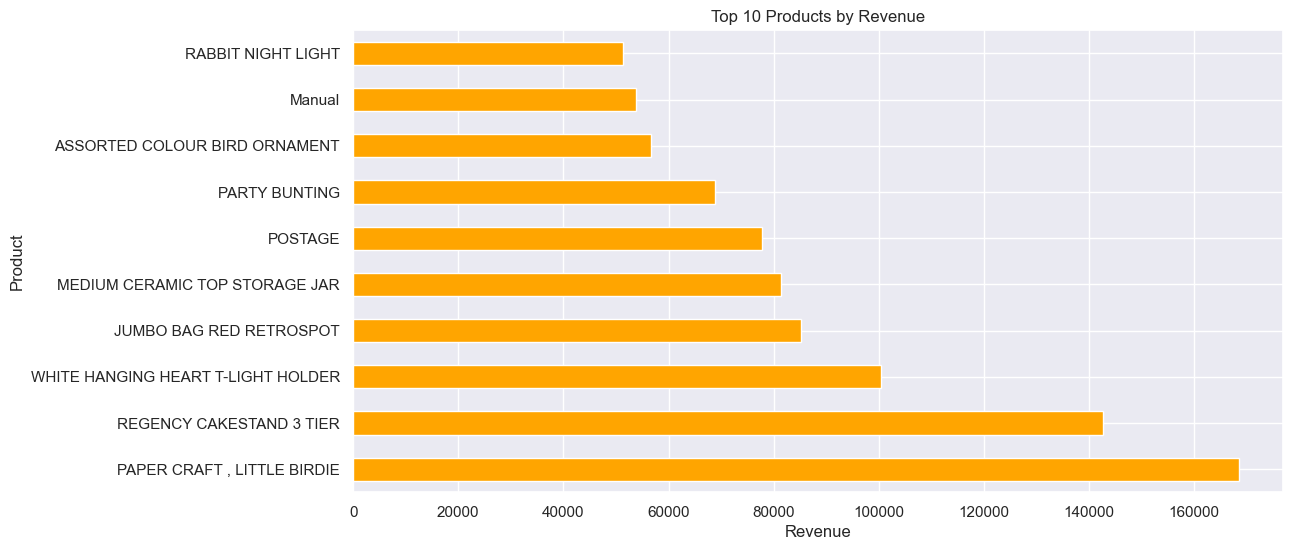

In [35]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', color='orange')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()


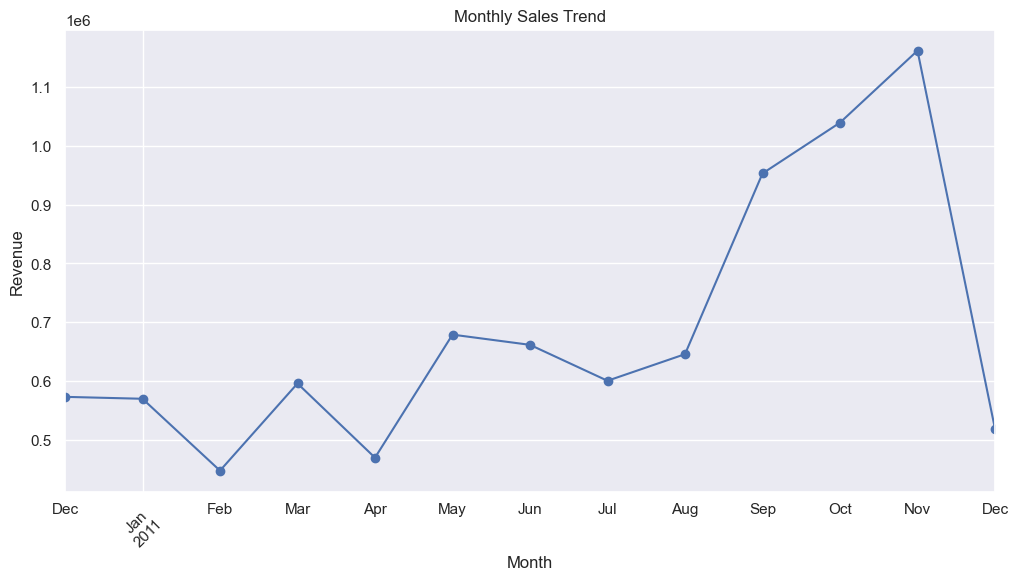

In [7]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


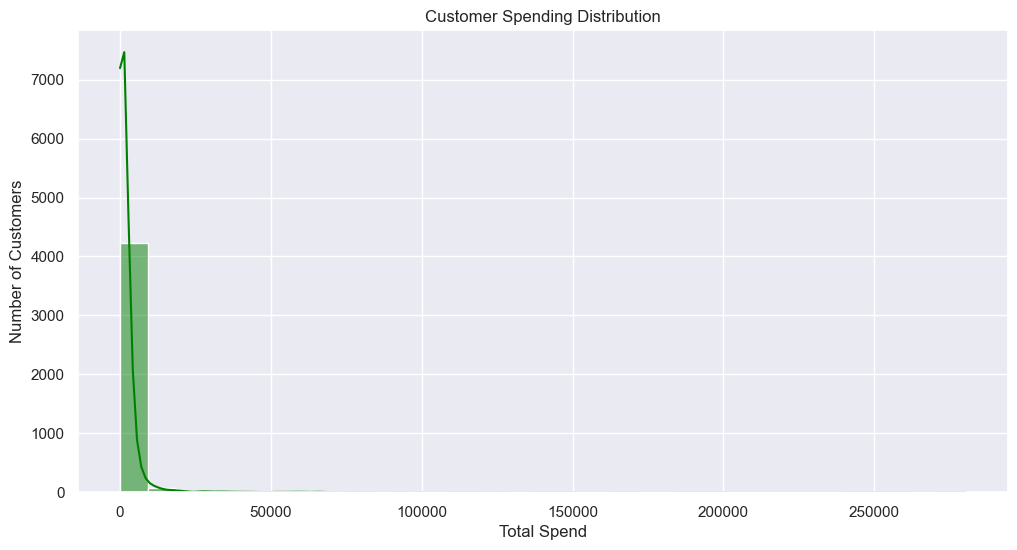

In [8]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

sns.histplot(customer_spending, bins=30, kde=True, color='green')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()


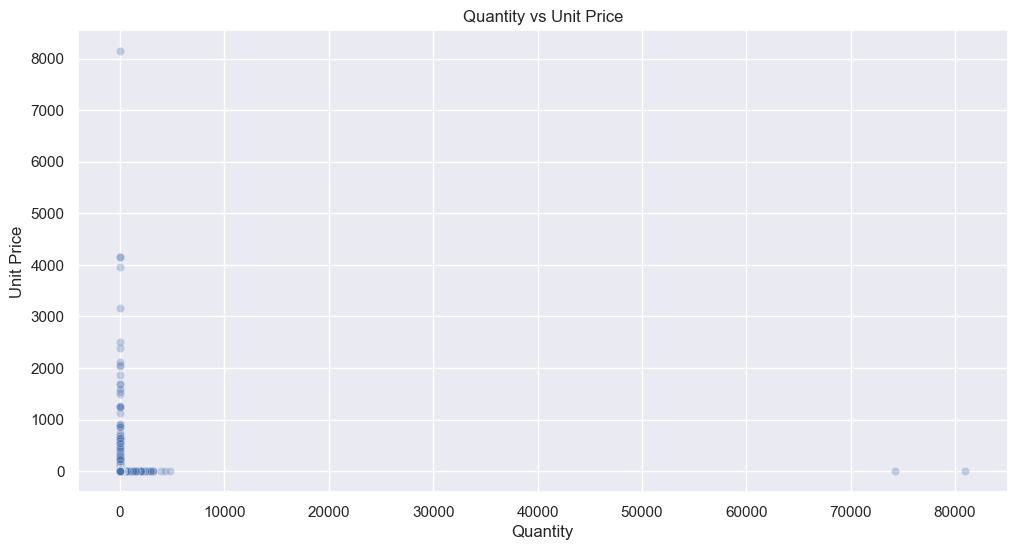

In [9]:
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, alpha=0.3)
plt.title('Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()


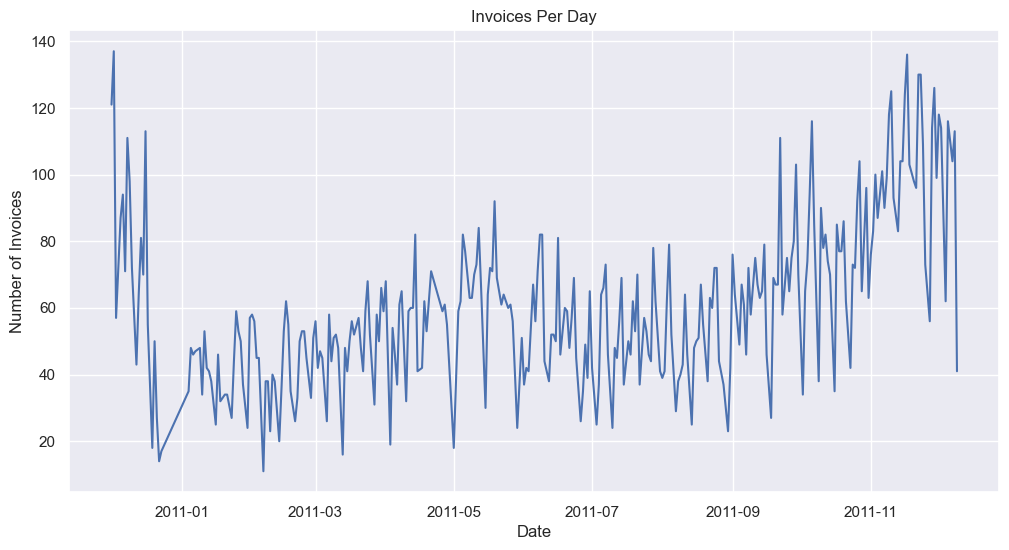

In [22]:
df['Day'] = df['InvoiceDate'].dt.date
invoices= df.groupby('Day')['InvoiceNo'].nunique()

invoices.plot(kind='line')
plt.title('Invoices Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.show()


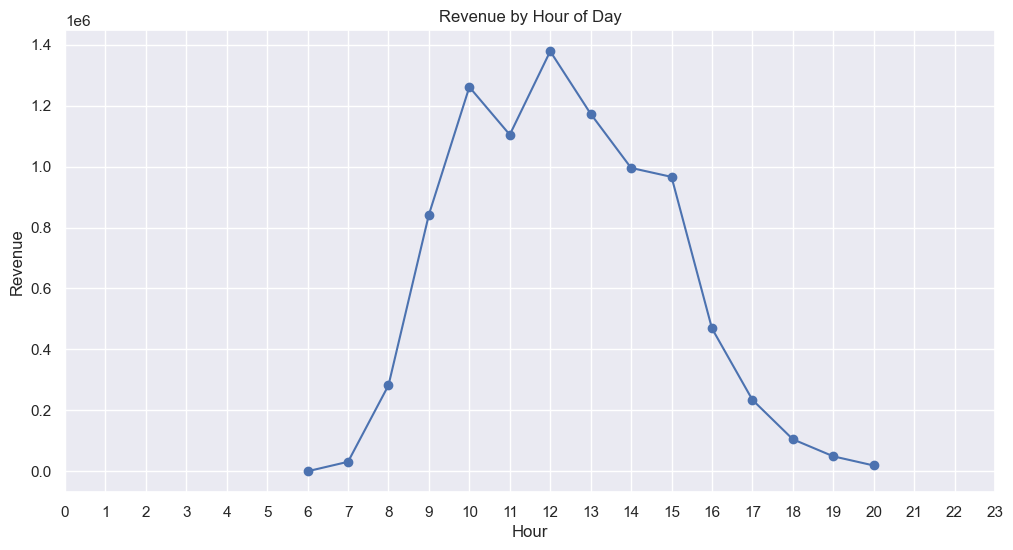

In [28]:
df['Hour'] = df['InvoiceDate'].dt.hour
revenue = df.groupby('Hour')['TotalPrice'].sum()

revenue.plot(kind='line', marker='o')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.xticks(range(0, 24))
plt.show()


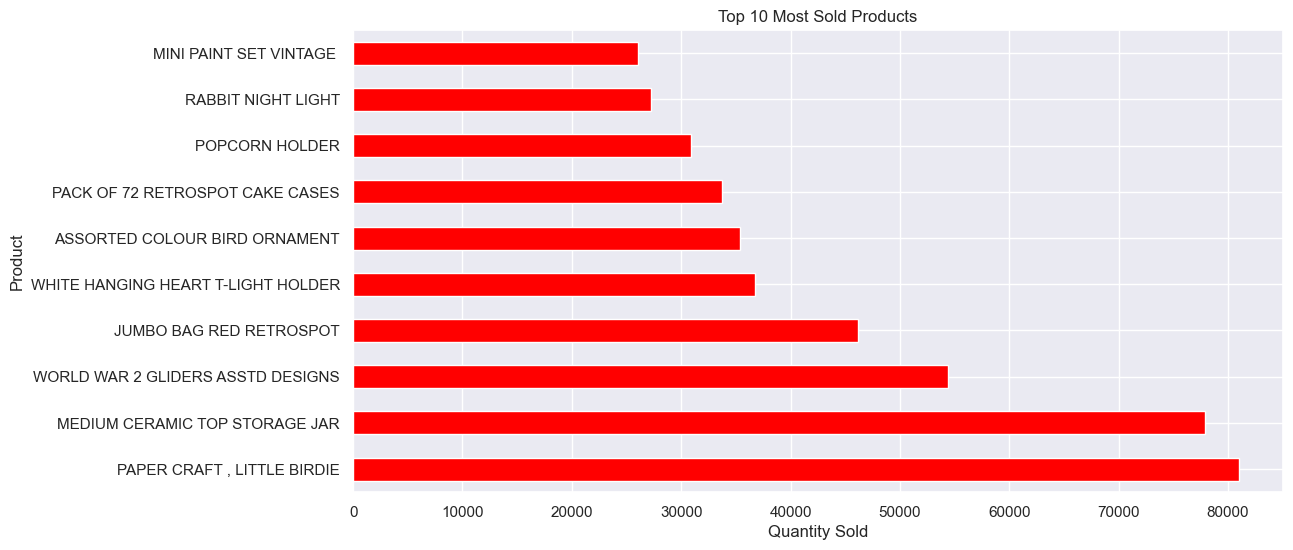

In [38]:
sold_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

sold_products.plot(kind='barh', color='red')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()
